# check image difference
this notebook is made to check the image difference between prediction and ground truth


In [1]:
from PIL import Image
from PIL import ImageChops
import os
import numpy as np
root = r'F:\2. Work Project\2020_FEM_ImageTransfer\00. Codes\0. Basic ImageTransfer\0. ModelDataResult'
path1 = r'\4. speed comparison\data\b'
path2 = r'\4. speed comparison\result'
item = r'\16_trans.jpg'
im1 = Image.open(root+path1+item)
im2 = Image.open(root+path2+item)
diff = ImageChops.difference(im2, im1)

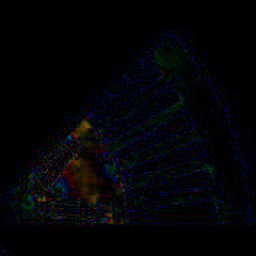

In [2]:
diff

# save difference image
The diff object is an image in which every pixel is the result of the subtraction of the color values of that pixel in the second image from the first image. Using the diff image you can do several things. The simplest one is the diff.getbbox() function. It will tell you the minimal rectangle that contains all the changes between your two images.

In [3]:
import os
dirs = os.listdir(root+path1)
path3 = r'\5. image compare'
for item in dirs:     
        im1 = Image.open(os.path.join(root+path1,item))
        im2 = Image.open(os.path.join(root+path2,item))
        diff = ImageChops.difference(im2, im1)
        diff.save(os.path.join(root+path3+'\difference',item))

# image loss: MSE & SSIM
the following code calculates two typical loss indices for image comparison

$$M S E=\frac{1}{m n} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1}[I(i, j)-K(i, j)]^{2}$$

$$\operatorname{SSIM}(x, y)=\frac{\left(2 \mu_{x} \mu_{y}+c_{1}\right)\left(2 \sigma_{x y}+c_{2}\right)}{\left(\mu_{x}^{2}+\mu_{y}^{2}+c_{1}\right)\left(\sigma_{x}^{2}+\sigma_{y}^{2}+c_{2}\right)}$$


In [38]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [32]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [33]:
def compare_images(imageA, imageB, flag_plot):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)
    if flag_plot == 1:
        # setup the figure
        fig = plt.figure()
        plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
        # show first image
        ax = fig.add_subplot(1, 2, 1)
        plt.imshow(imageA, cmap = plt.cm.gray)
        plt.axis("off")
        # show the second image
        ax = fig.add_subplot(1, 2, 2)
        plt.imshow(imageB, cmap = plt.cm.gray)
        plt.axis("off")
        # show the images
        plt.show()
        
    return m,s

In [34]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
ori1 = cv2.imread(root+path1+"/2_trans.jpg")
cont1 = cv2.imread(root+path2+"/2_trans.jpg")
ori1.shape

(256, 256, 3)

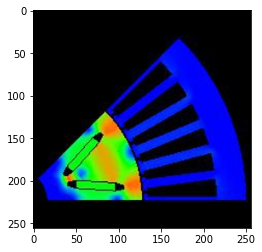

In [35]:
plt.imshow(cv2.cvtColor(ori1, cv2.COLOR_BGR2RGB))

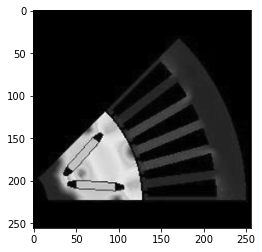

In [36]:
# convert the images to grayscale
ori2 = cv2.cvtColor(ori1, cv2.COLOR_BGR2GRAY)
cont2 = cv2.cvtColor(cont1, cv2.COLOR_BGR2GRAY)
plt.imshow(ori2,cmap = plt.cm.gray)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """


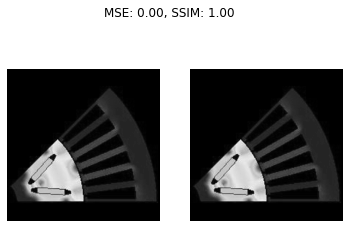

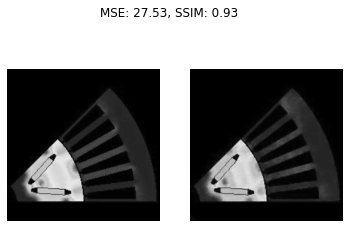

(27.533798217773438, 0.9326397337120934)

In [39]:
# compare the images
compare_images(ori2, ori2, 1)
compare_images(ori2, cont2, 1)

In [40]:
dirs = os.listdir(root+path1)
filename=[]
MSE=[]
SSIM=[]
for item in dirs:
    ori1 = cv2.imread(os.path.join(root+path1,item))
    cont1 = cv2.imread(os.path.join(root+path2,item))
    ori2 = cv2.cvtColor(ori1, cv2.COLOR_BGR2GRAY)
    cont2 = cv2.cvtColor(cont1, cv2.COLOR_BGR2GRAY)
    err1,err2 = compare_images(ori2, cont2, 0)
    filename.append(item)
    MSE.append(err1)
    SSIM.append(err2)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """


In [41]:
import pandas as pd
lst1 = range(100)
lst2 = range(100)
result_list = pd.DataFrame(
    {'filename': filename,
     'MSE': MSE,
     'SSIM': SSIM
     })
result_list

,filename,MSE,SSIM
0,1000_trans.jpg,43.458084,0.928454
1,1001_trans.jpg,30.206909,0.935133
2,1002_trans.jpg,30.378204,0.933776
3,1003_trans.jpg,30.533829,0.933619
4,1004_trans.jpg,28.129883,0.937830
...,...,...,...
1995,997_trans.jpg,48.099991,0.928660
1996,998_trans.jpg,42.100464,0.928687
1997,999_trans.jpg,43.663940,0.928280
1998,99_trans.jpg,49.364197,0.924294


In [42]:
result_list.to_csv(os.path.join(root+path3,'ERROR.csv'),index=False)